# Hands-on SHT (Shperical Harmonic Transform)

## 1. 正变换 & 反变换 (w/ T42 truncation)

使用Jeff Whitaker开发的spharm包，可以很方便地进行有关大气科学领域的球谐变换。该spharm包实际上是对NCAR的SPHEREPACK library（一个90年代用Fortran77写的）的python接口封装，并非是对其文档全部的封装，但绝大部分主流子程序都已封装了。简而言之，足够用、且好用。

### References:
* **spharm** package by J. Whitaker
  * https://github.com/jswhit/pyspharm
  * https://code.google.com/p/pyspharm/
* A barotropic model
  * https://github.com/lmadaus/Barotropic-Python
  * http://data1.gfdl.noaa.gov/~arl/pubrel/m/atm_dycores/src/atmos_spectral_barotropic/barotropic.pdf


(73, 144)


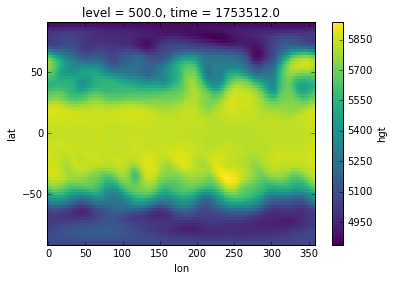

In [1]:
%matplotlib inline
import xarray as xr
import spharm as sh
import numpy as np

# read data
f = xr.open_dataset('hgt.2000.nc',decode_times=False)
lat = f.lat
lon = f.lon

Nlat = len(lat)
Nlon = len(lon)

PresLevel = 500
x = f.hgt.sel(level=PresLevel).isel(time=15)
x.plot()

x = np.array(x)   # 勿忘！xarray的数据需要纯化为numpy.array
print(x.shape)

(2701,)
[ 7.9567188e+03+0.j         -2.8005848e+01+0.j
 -3.6653647e+02+0.j         ...  9.5904320e-03-0.00610587j
  0.0000000e+00+0.j         -1.3644616e-03+0.j        ]
(73, 144)


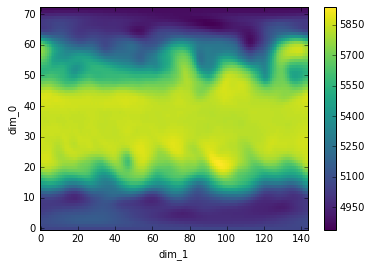

In [2]:
# init SHT
sht = sh.spharm.Spharmt(nlon=Nlon,nlat=Nlat,gridtype='regular')

# transform
x_spec = sht.grdtospec(x)      # 默认 ntrunc = Nlat-1
x_grid = sht.spectogrd(x_spec)
print(x_spec.shape)
print(x_spec)
print(x_grid.shape)

# plot
x_grid = xr.DataArray(x_grid)
x_grid[::-1].plot()

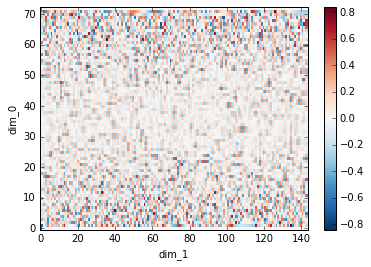

In [3]:
# check difference
x_diff = x_grid - x
x_diff.plot()

(946,)


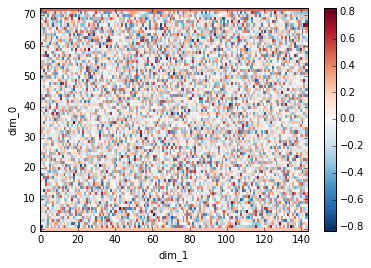

In [4]:
# transform w/ T42
Ntrunc = 42
x_spec = sht.grdtospec(x,Ntrunc)
x_grid = sht.spectogrd(x_spec)
print(x_spec.shape)

# plot
x_grid = xr.DataArray(x_grid)
#x_grid[::-1].plot()

# check difference
x_diff = x_grid - x
x_diff.plot()

## 2. 求空间导数 getgrad

### Note: 修改了 Lib/spharm.py 第878行，为了适应 python3 地板除的语法

* 878    #chispec = numpy.reshape(chispec, ((ntrunc+1)*(ntrunc+2)/2,1))
* 879    # XW/Apr/9/2018: use "//" to replace "/" for python3 syntax
* 880    chispec = numpy.reshape(chispec, ((ntrunc+1)*(ntrunc+2)//2,1))

In [5]:
xi,xj = sht.getgrad(x_spec)
print(x_spec.shape)
print(xi.shape,"BY",xj.shape)

(946,)
(73, 144) BY (73, 144)


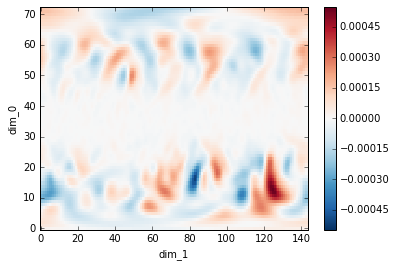

In [6]:
xr.DataArray(xi).plot()

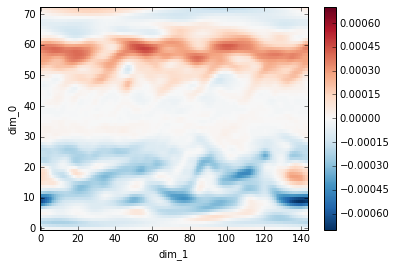

In [7]:
xr.DataArray(xj).plot()